In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


# Load prepared data

In [69]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/processed/"

In [70]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [71]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## Split data

### Data1: Splid data with mini experiment

In [73]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [74]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
2162688,0.0,0.0,0.0,0.0,0.0
2162689,0.0,0.0,0.0,0.0,0.0
2162690,0.0,0.0,0.0,0.0,0.0
2162691,0.0,0.0,0.0,0.0,0.0
2162692,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3063803,0.0,0.0,0.0,0.0,0.0
3063804,0.0,0.0,0.0,0.0,0.0
3063805,0.0,0.0,0.0,0.0,0.0
3063806,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train = df_train.iloc[:, 5:-1].values
y_train = df_train['theory'].values

X_test = df_test.iloc[:, 5:-1].values
y_test = df_test['theory'].values

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


### Data2: Splid data with mini experiment and i,j,k

In [84]:
df_train.iloc[:, 2:-1]

,i,j,k,mean0,mean1,mean2,mean3,mean4
2162688,0,0,0,0.0,0.0,0.0,0.0,0.0
2162689,0,0,1,0.0,0.0,0.0,0.0,0.0
2162690,0,0,2,0.0,0.0,0.0,0.0,0.0
2162691,0,0,3,0.0,0.0,0.0,0.0,0.0
2162692,0,0,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3063803,43,63,59,0.0,0.0,0.0,0.0,0.0
3063804,43,63,60,0.0,0.0,0.0,0.0,0.0
3063805,43,63,61,0.0,0.0,0.0,0.0,0.0
3063806,43,63,62,0.0,0.0,0.0,0.0,0.0


In [86]:
X_train2 = df_train.iloc[:, 2:-1].values
y_train2 = df_train['theory'].values

X_test2 = df_test.iloc[:, 2:-1].values
y_test2 = df_test['theory'].values

In [87]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(901120, 8)
(901120,)
(180224, 8)
(180224,)


# Neural Network

In [100]:
myCallbacks = [keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True), 
               keras.callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="max", patience = 5, 
                                        restore_best_weights = True)]

## Basic with Data1

In [77]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test], callbacks =[myCallbacks])

In [78]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))

28160/28160 [==============================] - 20s 719us/step
85.53211274217192
5632/5632 [==============================] - 4s 657us/step
87.03901109307228


In [79]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 808us/step - loss: 87.0356 - accuracy: 0.8064


[87.03561401367188, 0.8064020276069641]

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                120       
                                                                 
 dense_21 (Dense)            (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [88]:
history.history

{'loss': [173.6457977294922,
  82.79306030273438,
  74.0389175415039,
  71.92817687988281,
  69.80144500732422,
  69.0908432006836,
  68.36256408691406,
  68.08938598632812,
  67.7516098022461,
  67.67684936523438,
  67.53982543945312,
  67.24256134033203,
  67.06683349609375,
  67.19482421875,
  67.11072540283203,
  66.81205749511719,
  66.58445739746094,
  66.71542358398438,
  66.42630767822266,
  66.76673889160156],
 'accuracy': [0.8045998215675354,
  0.7985739707946777,
  0.6856689453125,
  0.7254494428634644,
  0.7895885109901428,
  0.8040072321891785,
  0.8057772517204285,
  0.8047995567321777,
  0.8052201867103577,
  0.8065052628517151,
  0.806506335735321,
  0.8064974546432495,
  0.8065152168273926,
  0.8065174221992493,
  0.8065029978752136,
  0.8065130114555359,
  0.8065118789672852,
  0.8064974546432495,
  0.806103527545929,
  0.8064908385276794],
 'val_loss': [77.06194305419922,
  75.17730712890625,
  68.72913360595703,
  67.291259765625,
  74.42076873779297,
  77.349998474

## Plot

### Loss function (MSE)

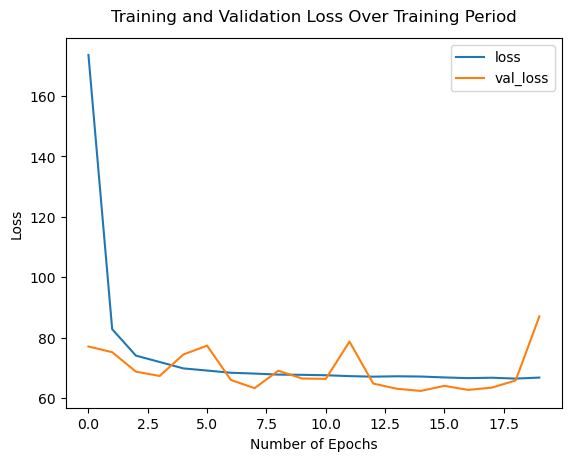

In [90]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

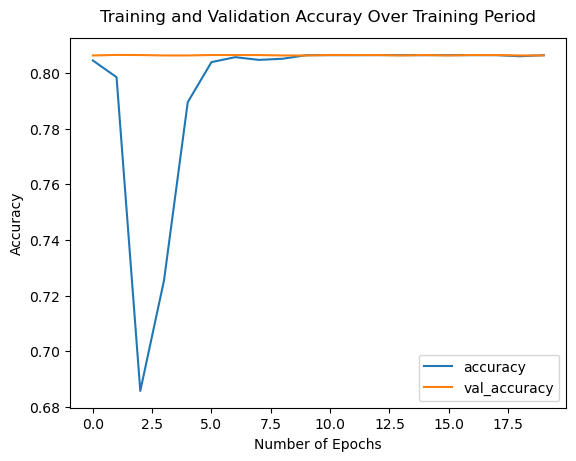

In [97]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

In [94]:
acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 0.00%


/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/782329503.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])


In [96]:
test_pred

array([[0.26248574],
       [0.26248574],
       [0.26248574],
       ...,
       [0.26248574],
       [0.26248574],
       [0.26248574]], dtype=float32)

## Basic with Data2

In [103]:
model2 = keras.Sequential()
model2.add(Dense(20, activation='relu', input_shape=[len(X_train2[0])]))
model2.add(Dense(1))
#
model2.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train2, y_train2, epochs=20, verbose=0, validation_data=[X_test2, y_test2], callbacks =[myCallbacks])


In [107]:
train_pred2 = model2.predict(X_train2)
print(mse(train_pred2, y_train2))
test_pred2 = model2.predict(X_test2)
print(mse(test_pred2, y_test2))

28160/28160 [==============================] - 19s 685us/step
62.05775791926022
5632/5632 [==============================] - 5s 813us/step
61.75742105883244


In [110]:
model2.evaluate(X_test2, y_test2)

5632/5632 [==============================] - 5s 821us/step - loss: 61.7572 - accuracy: 0.8054


[61.757198333740234, 0.8053977489471436]

In [111]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                180       
                                                                 
 dense_29 (Dense)            (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [112]:
history2.history

{'loss': [179.3175048828125,
  73.42144012451172,
  70.51079559326172,
  69.4720230102539,
  68.48657989501953,
  67.99214935302734,
  67.51224517822266,
  66.57466125488281,
  66.27994537353516,
  65.43144226074219,
  65.23480224609375,
  64.88019561767578,
  64.37574005126953,
  64.20289611816406,
  63.78620910644531,
  63.601165771484375],
 'accuracy': [0.7137184739112854,
  0.6838656067848206,
  0.5781716108322144,
  0.6652598977088928,
  0.712353527545929,
  0.7310158610343933,
  0.7299261093139648,
  0.7406427264213562,
  0.75048828125,
  0.7437410950660706,
  0.7220625281333923,
  0.7316095232963562,
  0.7319091558456421,
  0.743988573551178,
  0.7566494941711426,
  0.7719770669937134],
 'val_loss': [72.70930480957031,
  71.10872650146484,
  79.78734588623047,
  65.99857330322266,
  65.484375,
  64.48178100585938,
  65.63489532470703,
  71.93434143066406,
  62.302513122558594,
  63.507972717285156,
  61.757198333740234,
  64.5985336303711,
  61.765869140625,
  64.39620971679688,

## Plot

### Loss function (MSE)

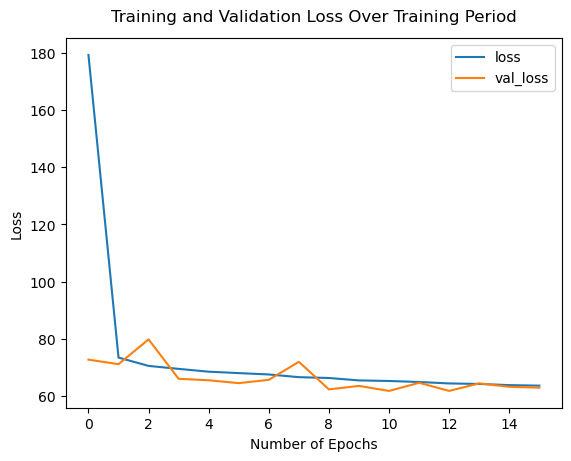

In [113]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

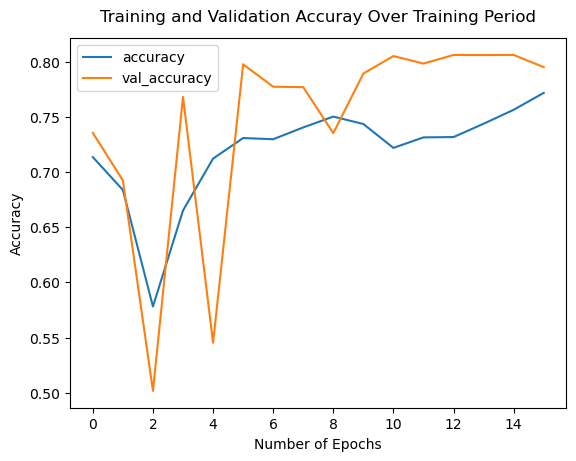

In [114]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

In [119]:
test_pred2

array([[ 0.6982533 ],
       [ 0.6657635 ],
       [ 0.6234076 ],
       ...,
       [-0.80281734],
       [-0.81414175],
       [-0.82546663]], dtype=float32)

## Convolutional Neural Network

In [148]:
# 1D Conv
input_shape = [len(X_train2[0]), 1]

model3 = keras.Sequential()
model3.add(layers.Conv1D(32, 3, activation ="relu", input_shape=input_shape))
model3.add(layers.MaxPooling1D(2))
model3.add(layers.Conv1D(64, 3, activation ="relu"))
model3.add(layers.MaxPooling1D(1))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation ="relu"))
model3.add(layers.Dense(1, activation ="softmax"))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train2, y_train2, epochs=20, verbose=0, validation_data=[X_test2, y_test2], callbacks =[myCallbacks])


In [149]:
train_pred3 = model3.predict(X_train2)
print(mse(train_pred3, y_train2))
test_pred3 = model3.predict(X_test2)
print(mse(test_pred3, y_test2))

28160/28160 [==============================] - 23s 821us/step
101.07454554252826
5632/5632 [==============================] - 4s 750us/step
101.32703448493652


In [150]:
model3.evaluate(X_test2, y_test2)

5632/5632 [==============================] - 5s 892us/step - loss: 101.3271 - accuracy: 5.5487e-06


[101.3271484375, 5.548650733544491e-06]

In [151]:
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 6, 32)             128       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 64)             6208      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)              

In [152]:
history3.history

{'loss': [101.0746078491211,
  101.07494354248047,
  101.07463836669922,
  101.07423400878906,
  101.0742416381836,
  101.0743408203125],
 'accuracy': [5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06],
 'val_loss': [101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375,
  101.3271484375],
 'val_accuracy': [5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06,
  5.548650733544491e-06]}

## Plot

### Loss function (MSE)

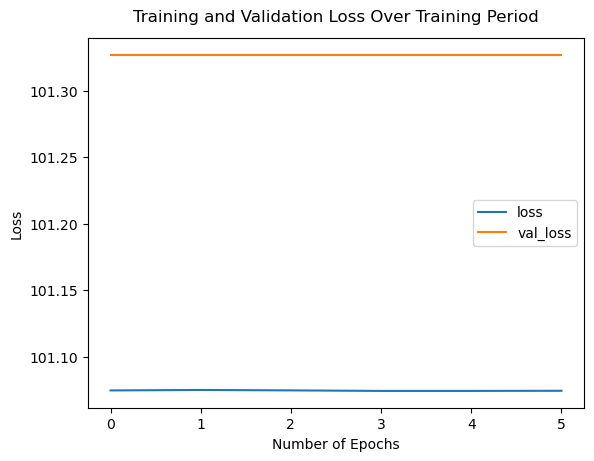

In [153]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

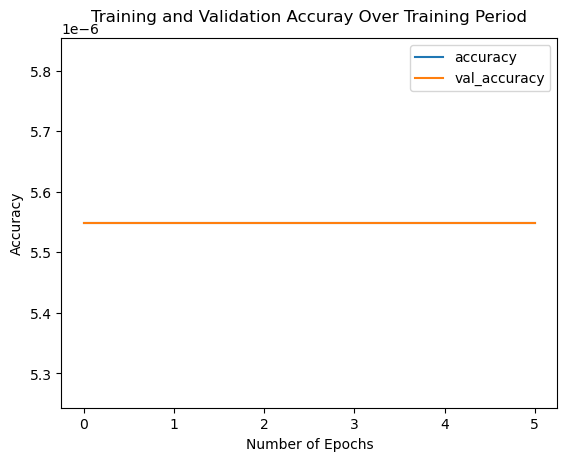

In [154]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

In [118]:
test_pred3

array([[ 0.6982533 ],
       [ 0.6657635 ],
       [ 0.6234076 ],
       ...,
       [-0.80281734],
       [-0.81414175],
       [-0.82546663]], dtype=float32)

# Output image data

In [115]:
df_test['predict'] = test_pred
df_test['predict2'] = test_pred2
df_test['predict3'] = test_pred3

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict2']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_test[['i', 'j', 'k', 'predict3']], fmt="%i %i %i %s")